# Linear Regression Project: JFK Flight Data
### Kieran Thakkar

In [2]:
# Import modules and dataset
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV

df = pd.read_csv("data.csv")
df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,B6,N216JB,ORH,2,57,150,1370,...,38,96,N,6,0,30.18,Cloudy,20,32,19
28816,1,31,5,AA,N104NN,BOS,2,75,187,1390,...,38,96,N,6,0,30.18,Cloudy,19,23,22
28817,1,31,5,AS,N581AS,SEA,283,392,2422,1125,...,38,96,N,6,0,30.18,Cloudy,19,23,21
28818,1,31,5,B6,N957JB,SJU,5,224,1598,1417,...,38,96,N,6,0,30.18,Cloudy,19,23,13


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

<Axes: >

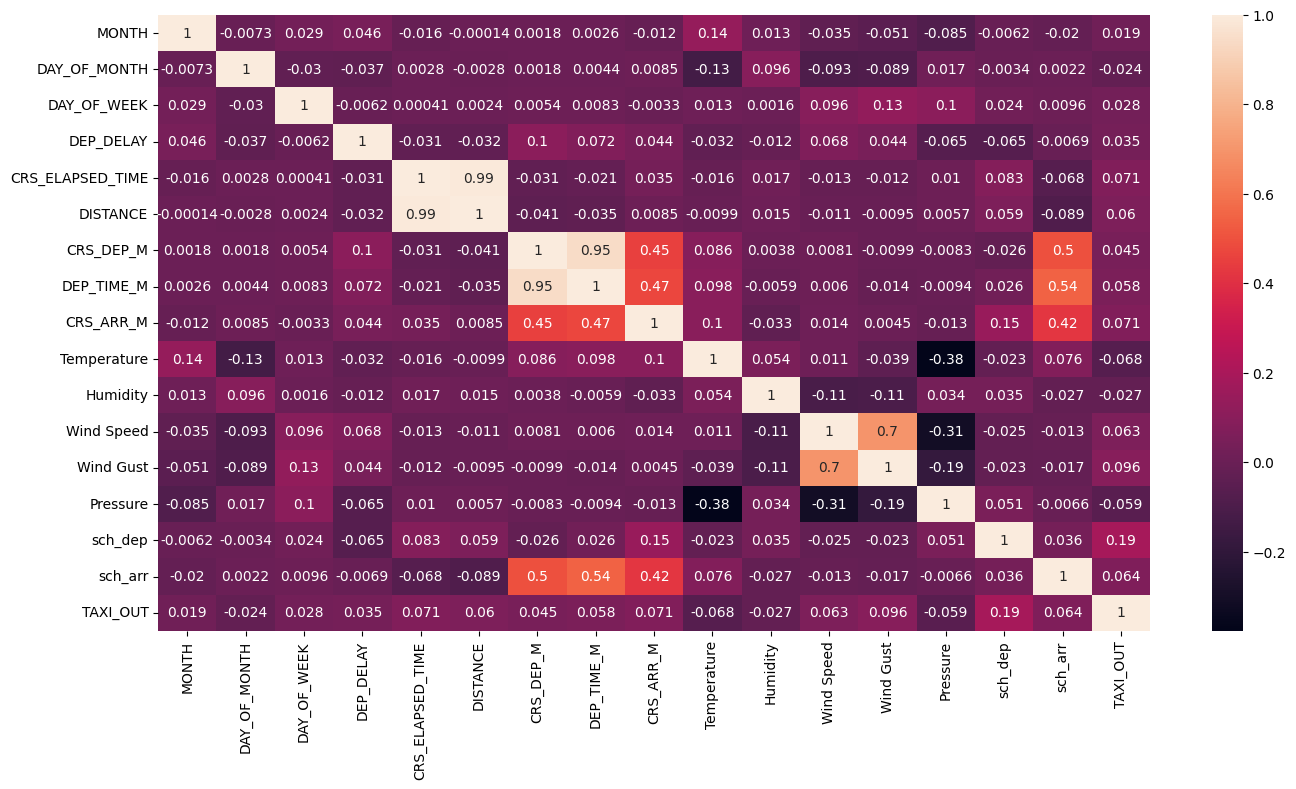

In [13]:
# Heat map from correlation matrix
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True)

In [39]:
conditions = df["OP_UNIQUE_CARRIER"].value_counts()
conditions

OP_UNIQUE_CARRIER
B6    9589
DL    7680
9E    4485
AA    3595
AS    1111
MQ    1045
YX     914
OO     311
HA      90
Name: count, dtype: int64

In [46]:
new = df.groupby("OP_UNIQUE_CARRIER").value_counts()
new

OP_UNIQUE_CARRIER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK  TAIL_NUM  DEST  DEP_DELAY  CRS_ELAPSED_TIME  DISTANCE  CRS_DEP_M  DEP_TIME_M  CRS_ARR_M  Temperature  Dew Point  Humidity  Wind  Wind Speed  Wind Gust  Pressure  Condition              sch_dep  sch_arr  TAXI_OUT
9E                 1      1             3            N195PQ    DFW    2         271               1391      1100       1102        1311       37           22         54        W     16          0          29.86     Mostly Cloudy          40       34       41          1
                                                     N200PQ    BNA   -4         172               765       1125       1121        1237       37           22         54        W     16          0          29.86     Mostly Cloudy          40       34       33          1
                   12     17            2            N319PQ    BNA   -2         173               765       517        515         630        34           34         10        NE    14          0

### What do we want to investigate?
"Taxi-Out prediction has been an important concept as it helps in calculating Runway time and directly impact the cost of the flight."

####Lets see if we can estimate TAXI_OUT.
Lets look at numeric data only, and see if we can split the data into several parts.

1. Wind direction
2. Weather condition ()

To do this we don't need several bits of data: 


In [48]:
droppers = ["OP_UNIQUE_CARRIER", "TAIL_NUM", "DEST", "Dew Point", "Wind", "Condition"]
cleaned = df.drop(columns=droppers)
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MONTH             28820 non-null  int64  
 1   DAY_OF_MONTH      28820 non-null  int64  
 2   DAY_OF_WEEK       28820 non-null  int64  
 3   DEP_DELAY         28820 non-null  int64  
 4   CRS_ELAPSED_TIME  28820 non-null  int64  
 5   DISTANCE          28820 non-null  int64  
 6   CRS_DEP_M         28820 non-null  int64  
 7   DEP_TIME_M        28820 non-null  int64  
 8   CRS_ARR_M         28820 non-null  int64  
 9   Temperature       28820 non-null  int64  
 10  Humidity          28820 non-null  int64  
 11  Wind Speed        28820 non-null  int64  
 12  Wind Gust         28820 non-null  int64  
 13  Pressure          28820 non-null  float64
 14  sch_dep           28820 non-null  int64  
 15  sch_arr           28820 non-null  int64  
 16  TAXI_OUT          28820 non-null  int64 

In [63]:
y = df.TAXI_OUT

In [67]:
allX = cleaned.iloc[:,:-1] # all numeric data except TAXI_OUT

# split the data. 90% training, 10% testing.
allX_train, allX_test, y_train, y_test = train_test_split(allX, y, test_size=0.1, random_state=69)

In [68]:
# linear regression
linearReg = LinearRegression()
linearReg.fit(allX_train, y_train)

y_allX_basicLinReg = linearReg.predict(allX_test)

test_allX_basicLinReg = pd.DataFrame({"Actual":y_test,"Predicted":y_allX_basicLinReg})
test_allX_basicLinReg.head()

,Actual,Predicted
17487,15,22.157779
9680,21,22.954197
27675,10,22.171499
16461,17,21.689383
8868,40,22.591289


In [73]:
# LASSO
lassoReg = Lasso(alpha=0.01)
lassoReg.fit(allX_train, y_train)

y_allX_LASSO = lassoReg.predict(allX_test)

test_allX_LASSO = pd.DataFrame({"Actual": y_test, "Predicted": y_allX_LASSO})
test_allX_LASSO.head()

C:\Users\kthak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.270e+02, tolerance: 1.212e+02
  model = cd_fast.enet_coordinate_descent(


,Actual,Predicted
17487,15,22.193598
9680,21,22.911121
27675,10,22.149343
16461,17,21.702660
8868,40,22.543375


In [ ]:
# RIDGE
ridgeReg = Ridge(alpha=0.01)
ridgeReg.fit(allX_train, y_train)

y_allX_RIDGE = lassoReg.predict(allX_test)

test_allX_LASSO = pd.DataFrame({"Actual": y_test, "Predicted": y_allX_RIDGE})
test_allX_LASSO.head()